# DIAMONDS IN-DEPTH ANALYSIS


# Topics
1. [**Exploring Dataset**](#there_you_go_1)
2. [**Correlation b/w Features**](#there_you_go_2)
3. [**Visualizations**](#there_you_go_3)
4. [**Feature Engineering**](#there_you_go_4)
5. [**Feature Encoding**](#there_you_go_5)
6. [**Feature Scaling**](#there_you_go_6)
7. [**Modelling Algorithms**](#there_you_go_7)
8. [**Comparing R2 Scores**](#there_you_go_8)

## What are Diamonds?
* **Diamonds are the Precious stone consisting of a clear and colourless Crystalline form of pure carbon.**
* **They are the hardest Gemstones known to man and can be scratched only by other Diamonds.**

![](https://i.imgur.com/blhMqmD.jpg)

## How Diamonds are formed?
* **Diamonds are formed deep within the Earth about 100 miles or so below the surface in the upper mantle.**
* **Obviously in that part of the Earth it’s very hot.** 
* **There’s a lot of pressure, the weight of the overlying rock bearing down, so that combination of high temperature and high pressure is what’s necessary to grow diamond crystals in the Earth.**

## Why are Diamonds so Valuable?
* **Whether it is a Rare book, a fine bottle of Scotch, or a Diamond, something that is Rare and Unique is often expensive.**
* **But what makes it truly Valuable is that this Rarity coincides with the desire of many to possess it. ;)**
* **Diamonds are Rare because of the Incredibly powerful forces needed to create them.**


* **And therefore Diamonds are considered to be Very Costly.**

<a id="there_you_go_1"></a>
# 1) Explore Dataset & Examine what Features affect the Price of Diamonds.

## 1.1) Importing Libraries

In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor




# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler,  LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#import missingno as msno



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [2]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

## 1.2) Extract Dataset
* Specify the location to the Dataset and Import them.

In [3]:
df = pd.read_csv('diamonds.csv')
diamonds = df.copy()

In [4]:
# How the data looks
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1.3) Features
* **Carat : ** Carat weight of the Diamond.
* **Cut : ** Describe cut quality of the diamond.
> * Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
* **Color : ** Color of the Diamond.
> * With D being the best and J the worst.
* **Clarity : ** Diamond Clarity refers to the absence of the Inclusions and Blemishes.
> * (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* **Depth : ** The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
* **Table : ** The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
* **Price : ** the Price of the Diamond.
* **X : ** Length of the Diamond in mm.
* **Y : ** Width of the Diamond in mm.
* **Z : ** Height of the Diamond in mm.

*Qualitative Features (Categorical) : Cut, Color, Clarity. *

*Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.*


### Price is the Target Variable.

![](https://i.imgur.com/Bbf0GWk.jpg)

In [ ]:
# We'll Explore All the features in the Later Part, Now let's look for Null Values if any..

## 1.4) Drop the 'Unnamed: 0' column as we already have Index.

In [5]:
df.drop(['Unnamed: 0'] , axis=1 , inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.shape

(53940, 10)

In [ ]:
# So, We have 53,940 rows and 10 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## 1.5) Examine NaN Values

In [8]:
# It seems there are no Null Values.
# Let's Confirm
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#msno.matrix(df) # just to visualize. no missing values.

### Great, So there are no NaN values.

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Wait
* **Do you see the Min. Values of X, Y and Z. It can't be possible..!!**
* **It doesn't make any sense to have either of Length or Width or Height to be zero..**

### Let's Have a look at them.

In [10]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [11]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

### We can see there are 20 rows with Dimensions 'Zero'.
* **We'll Drop them as it seems better choice instead of filling them with any of Mean or Median**

## 1.6) Dropping Rows with Dimensions 'Zero'.

In [12]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [13]:
# Just to Confirm
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [ ]:
# Nice and Clean. :)

## 1.7) Scaling of all Features

In [1]:
import seaborn
seaborn.factorplot(data=df , kind='box' , size=7, aspect=2.5)

AttributeError: module 'seaborn' has no attribute 'factorplot'

**The Values are Distributed over a Small Scale.**

<a id="there_you_go_2"></a>
# 2) Correlation Between Features

<AxesSubplot:>

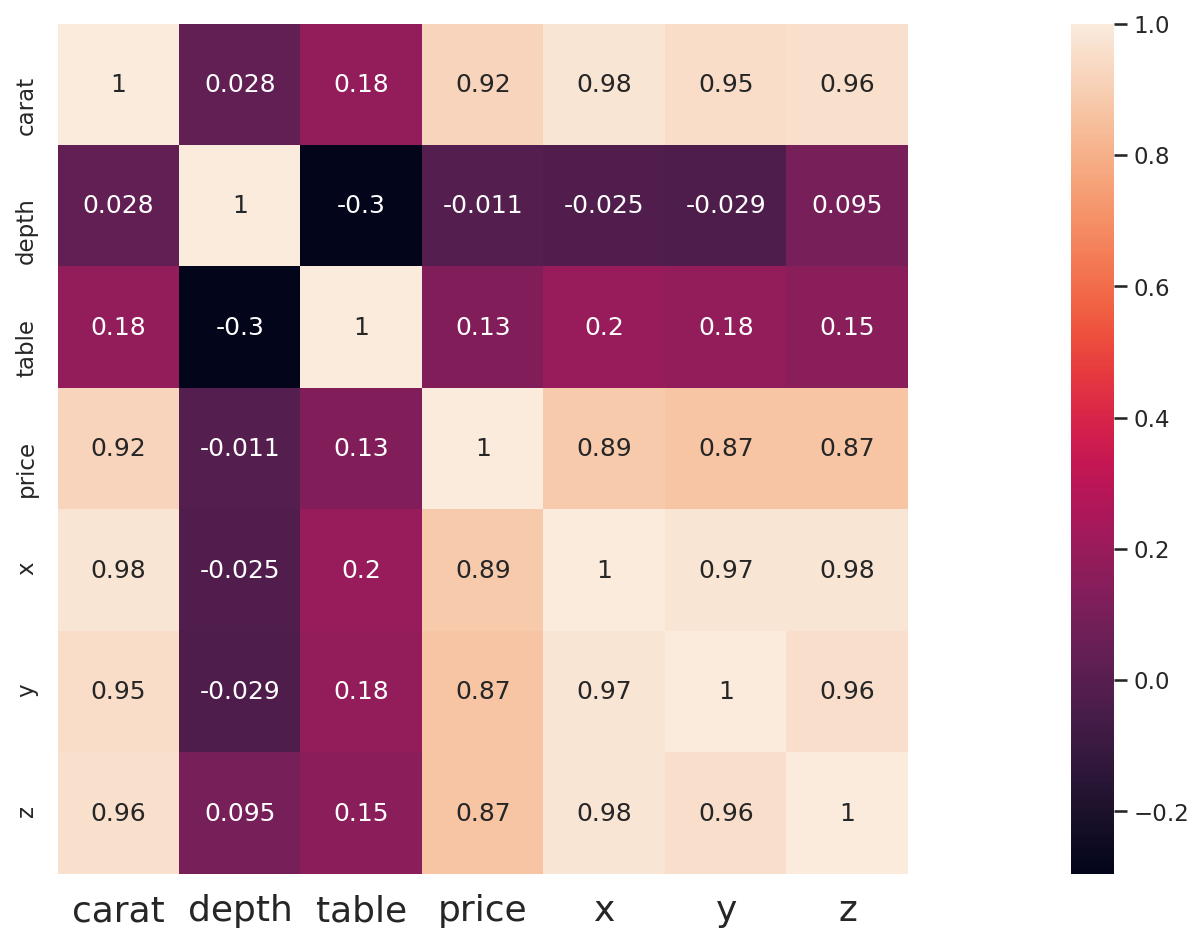

In [15]:
# Correlation Map
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

## CONCLUSIONS :
**1. Depth is inversely related to Price.**
> * This is because if a Diamond's Depth percentage is too large or small the Diamond will become '__Dark__' in appearance because it will no longer return an Attractive amount of light.

**2. The Price of the Diamond is highly correlated to Carat, and its Dimensions.**

**3. The Weight (Carat) of a diamond has the most significant impact on its Price. **
> * Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more '__Expensive__' than the total cost of two 1 Carat Diamonds of the same Quality.

**4. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.**

**5. Self Relation ie. of a feature to itself is 1 as expected.**

**6. Some other Inferences can also be drawn.**

<a id="there_you_go_3"></a>
# 3. Visualization Of All Features

## 3.1) Carat

* **Carat refers to the Weight of the Stone, not the Size.**
* **The Weight of a Diamond has the most significant Impact on its Price.**
* **Since the larger a Stone is, the Rarer it is, one 2 Carat Diamond will be more Expensive than the Total cost of two 1 Carat Diamonds of the Same Quality.**
* **The carat of a Diamond is often very Important to People when shopping But it is a Mistake to Sacrifice too much quality for sheer size.**


[Click Here to Learn More about How Carat Affects the Price of Diamonds.](https://www.diamondlighthouse.com/blog/2014/10/23/how-carat-weight-affects-diamond-price/)

![](https://i.imgur.com/hA3oat5.png)

In [ ]:
# Visualize via kde plots

<AxesSubplot:xlabel='carat', ylabel='Density'>

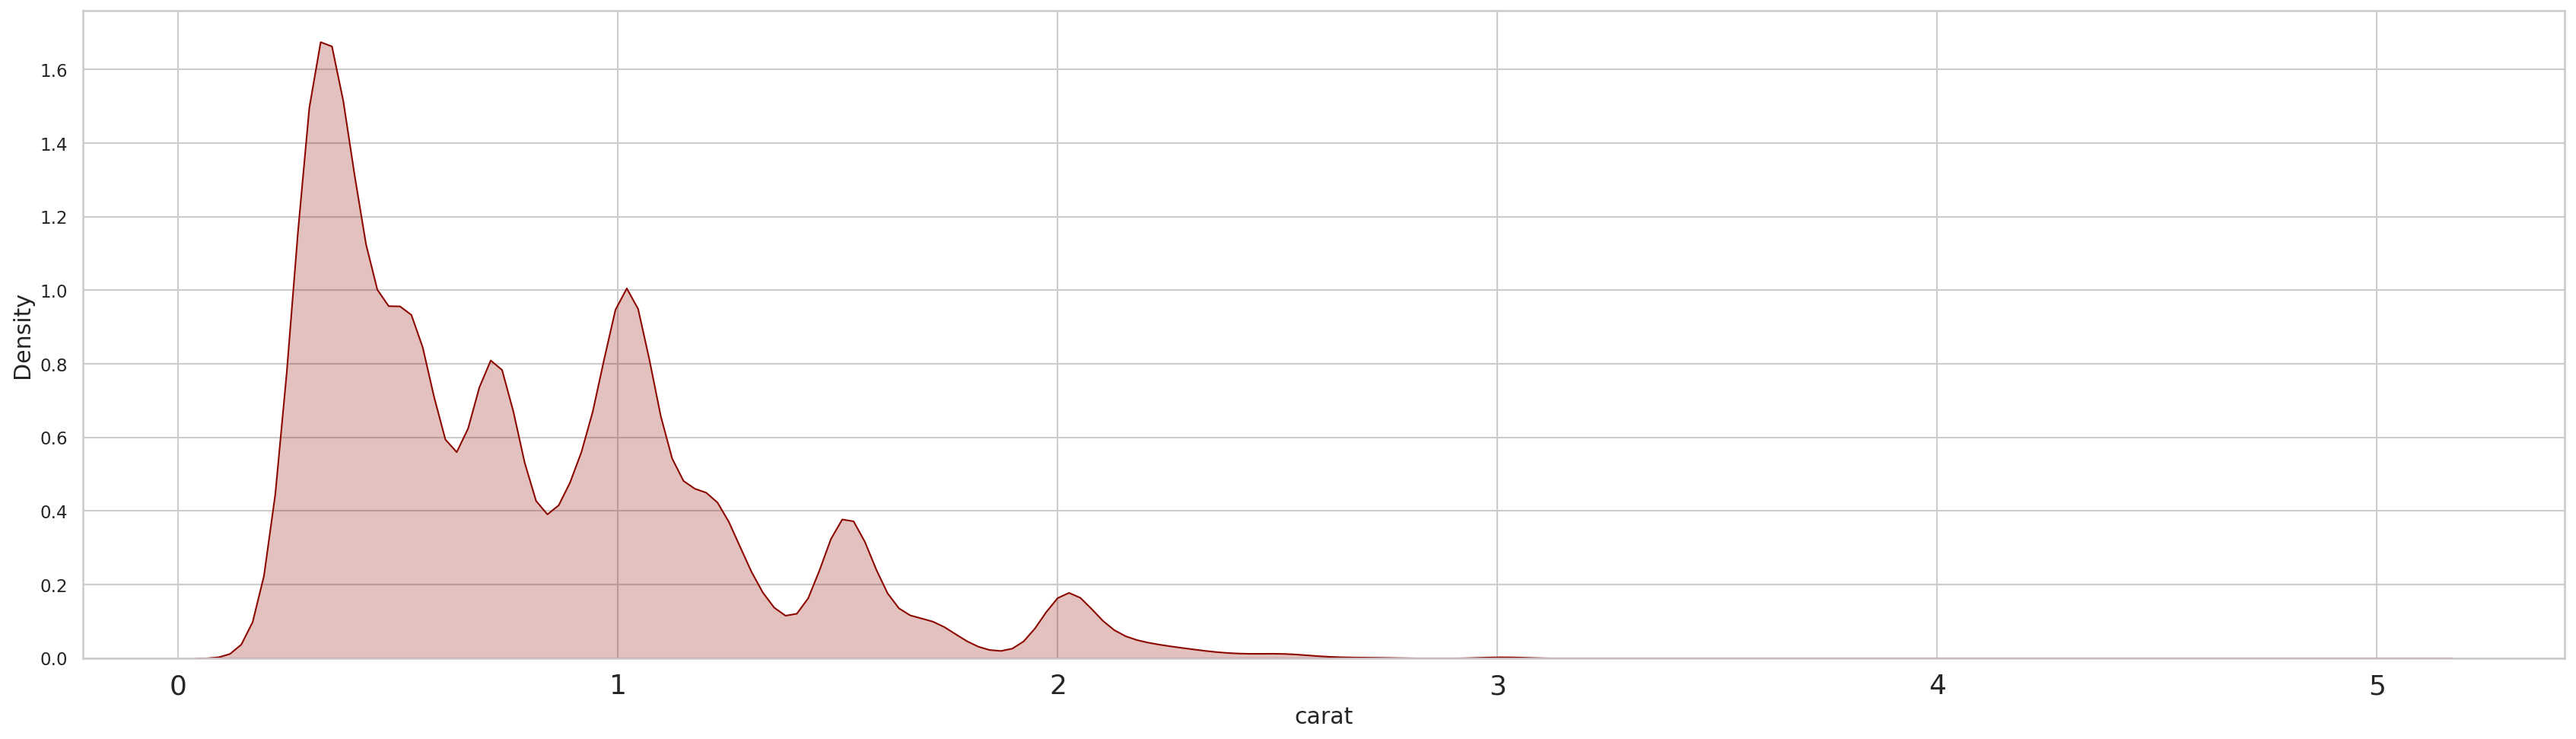

In [16]:
sns.kdeplot(df['carat'], shade=True , color='r')

### Carat vs Price

In [ ]:
sns.jointplot(x='carat' , y='price' , data=df , size=5)

### It seems that Carat varies with Price Exponentially.

## 3.2) Cut

* **Although the Carat Weight of a Diamond has the Strongest Effect on Prices, the Cut can still Drastically Increase or Decrease its value.**
* **With a Higher Cut Quality, the Diamond’s Cost per Carat Increases.**
* **This is because there is a Higher Wastage of the Rough Stone as more Material needs to be Removed in order to achieve better Proportions and Symmetry.**

[Click Here to Lean More about How Cut Affects the Price.](https://www.lumeradiamonds.com/diamond-education/diamond-cut)

![](https://i.imgur.com/6PannTm.jpg)

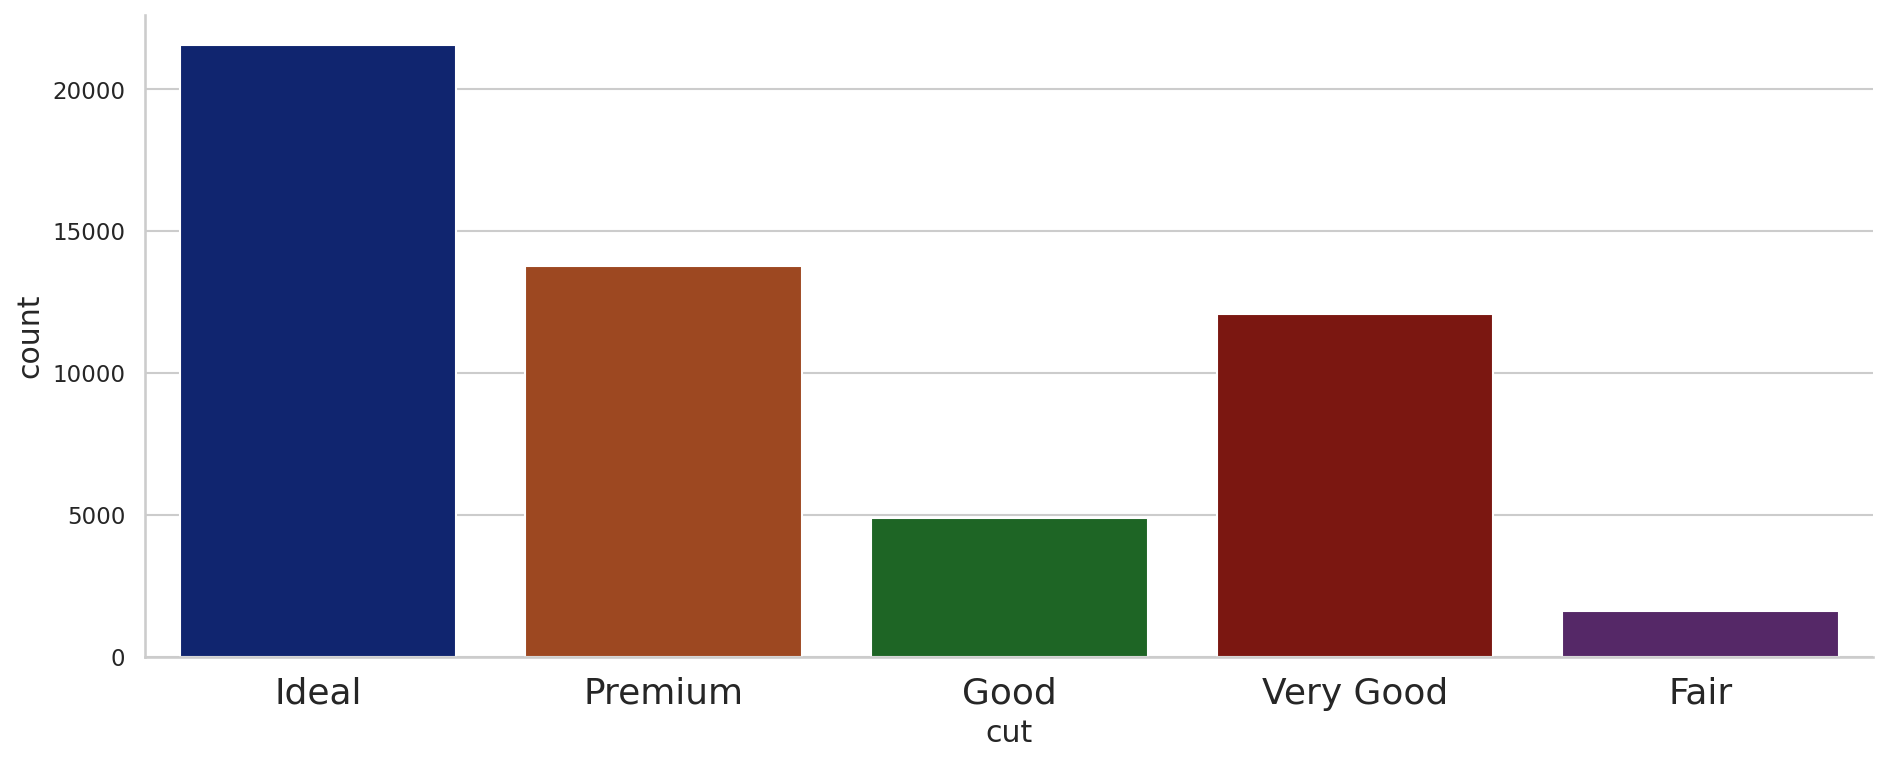

In [17]:
sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 )

## Cut vs Price

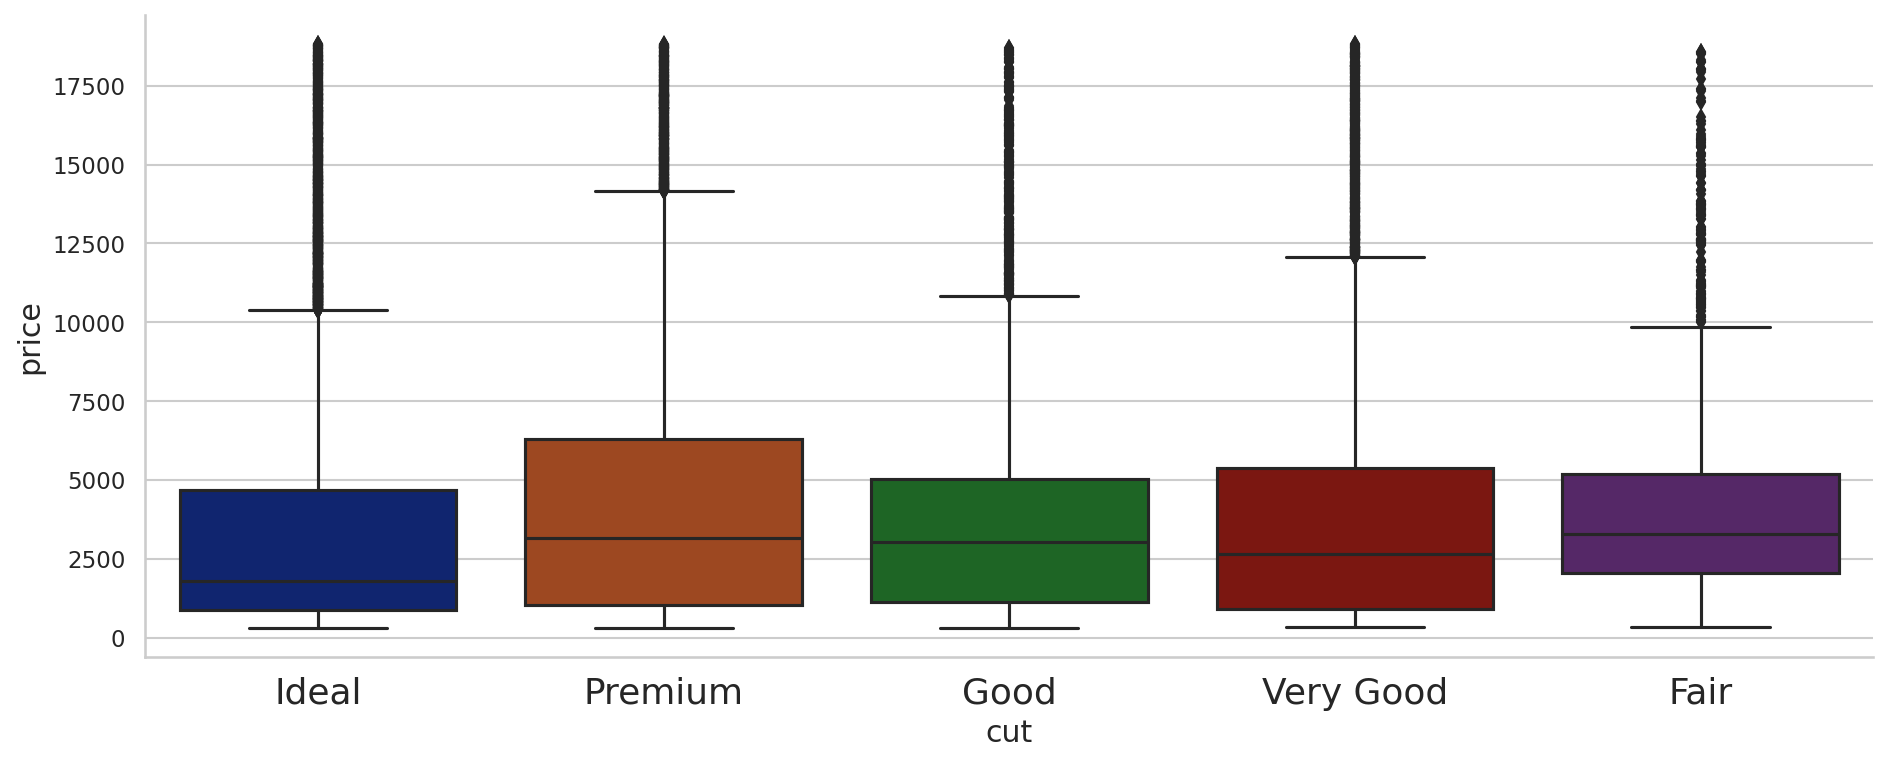

In [18]:
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

In [ ]:
# Understanding Box Plot :

# The bottom line indicates the min value.
# The upper line indicates the max value.
# The middle line of the box is the median or the 50% percentile.
# The side lines of the box are the 25 and 75 percentiles respectively.

### Premium Cut on Diamonds as we can see are the most Expensive, followed by Excellent / Very Good Cut.

## 3.3) Color
* **The Color of a Diamond refers to the Tone and Saturation of Color, or the Depth of Color in a Diamond.**
* **The Color of a Diamond can Range from Colorless to a Yellow or a Faint Brownish Colored hue.**
* **Colorless Diamonds are Rarer and more Valuable because they appear Whiter and Brighter.**

[Click Here to Learn More about How Color Affects the Price](https://enchanteddiamonds.com/education/understanding-diamond-color)

![](https://i.imgur.com/Ij090Kn.jpg)

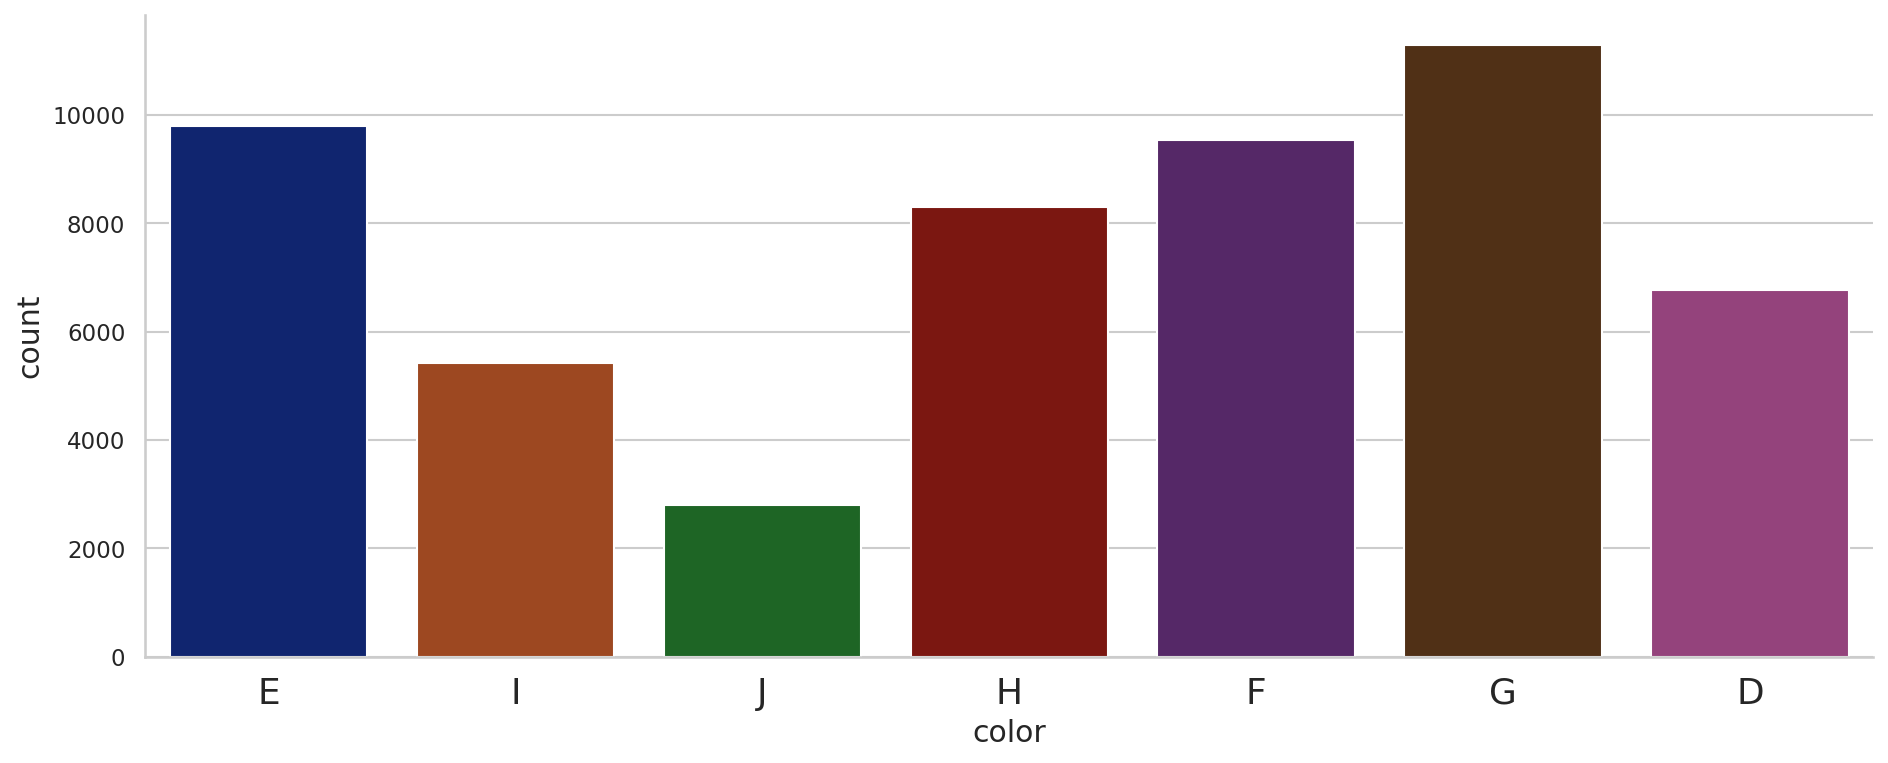

In [19]:
sns.factorplot(x='color', data=df , kind='count',aspect=2.5 )

### Color vs Price

In [ ]:
sns.factorplot(x='color', y='price' , data=df , kind='violin', aspect=2.5)

## 3.4) Clarity
* **Diamond Clarity refers to the absence of the Inclusions and Blemishes.**
* **An Inclusion is an Imperfection located within a Diamond. Inclusions can be Cracks or even Small Minerals or Crystals that have formed inside the Diamond.**
* **Blemishing is a result of utting and polishing process than the environmental conditions in which the diamond was formed. It includes scratches, extra facets etc.**

[Click Here to Learn More about How Clarity Affects the Price of Diamonds.](https://www.diamondmansion.com/blog/understanding-how-diamond-clarity-affects-value/)

![](https://i.imgur.com/fLbAstc.jpg)

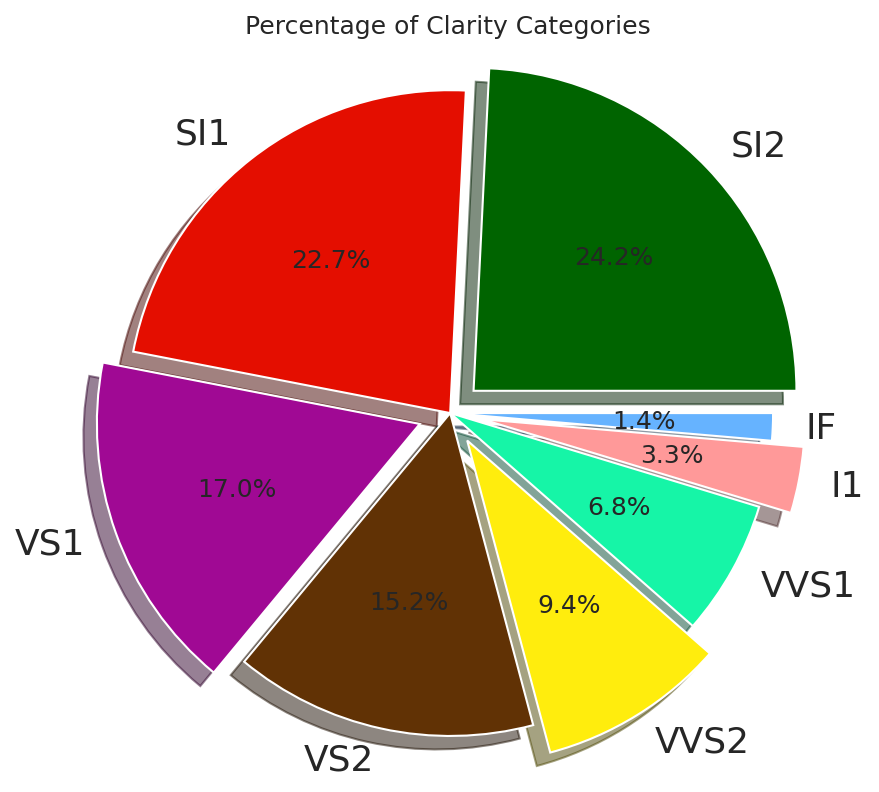

In [20]:
import matplotlib.pyplot as plt

labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

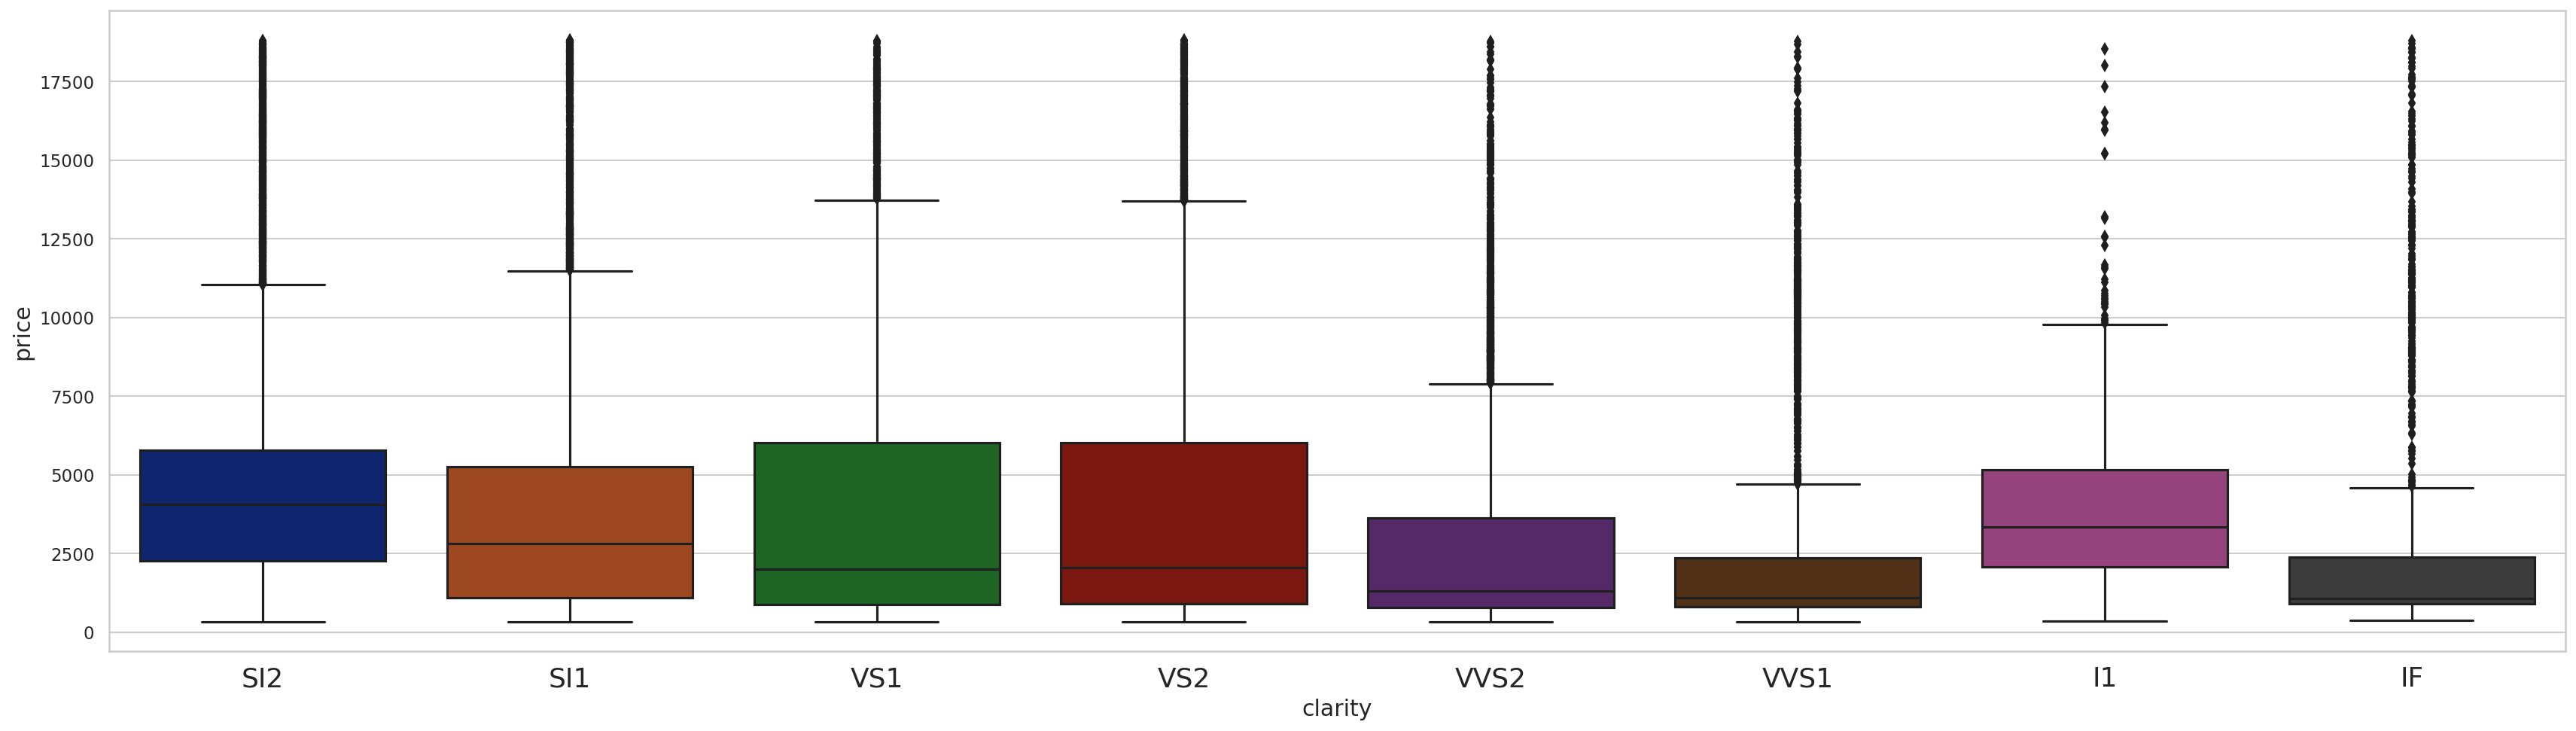

In [21]:
sns.boxplot(x='clarity', y='price', data=df )

### It seems that VS1 and VS2 affect the Diamond's Price equally having quite high Price margin.

## 3.5) Depth
* **The Depth of a Diamond is its Height (in millimeters) measured from the Culet to the Table.**
* **If a Diamond's Depth Percentage is too large or small the Diamond will become Dark in appearance because it will no longer return an Attractive amount of light.**

[Click Here to Learn More about How Depth Affects the Price of Diamonds.](https://beyond4cs.com/grading/depth-and-table-values/)

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4240e+03, 5.0730e+03, 1.8242e+04, 2.2649e+04, 5.0330e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <BarContainer object of 25 artists>)

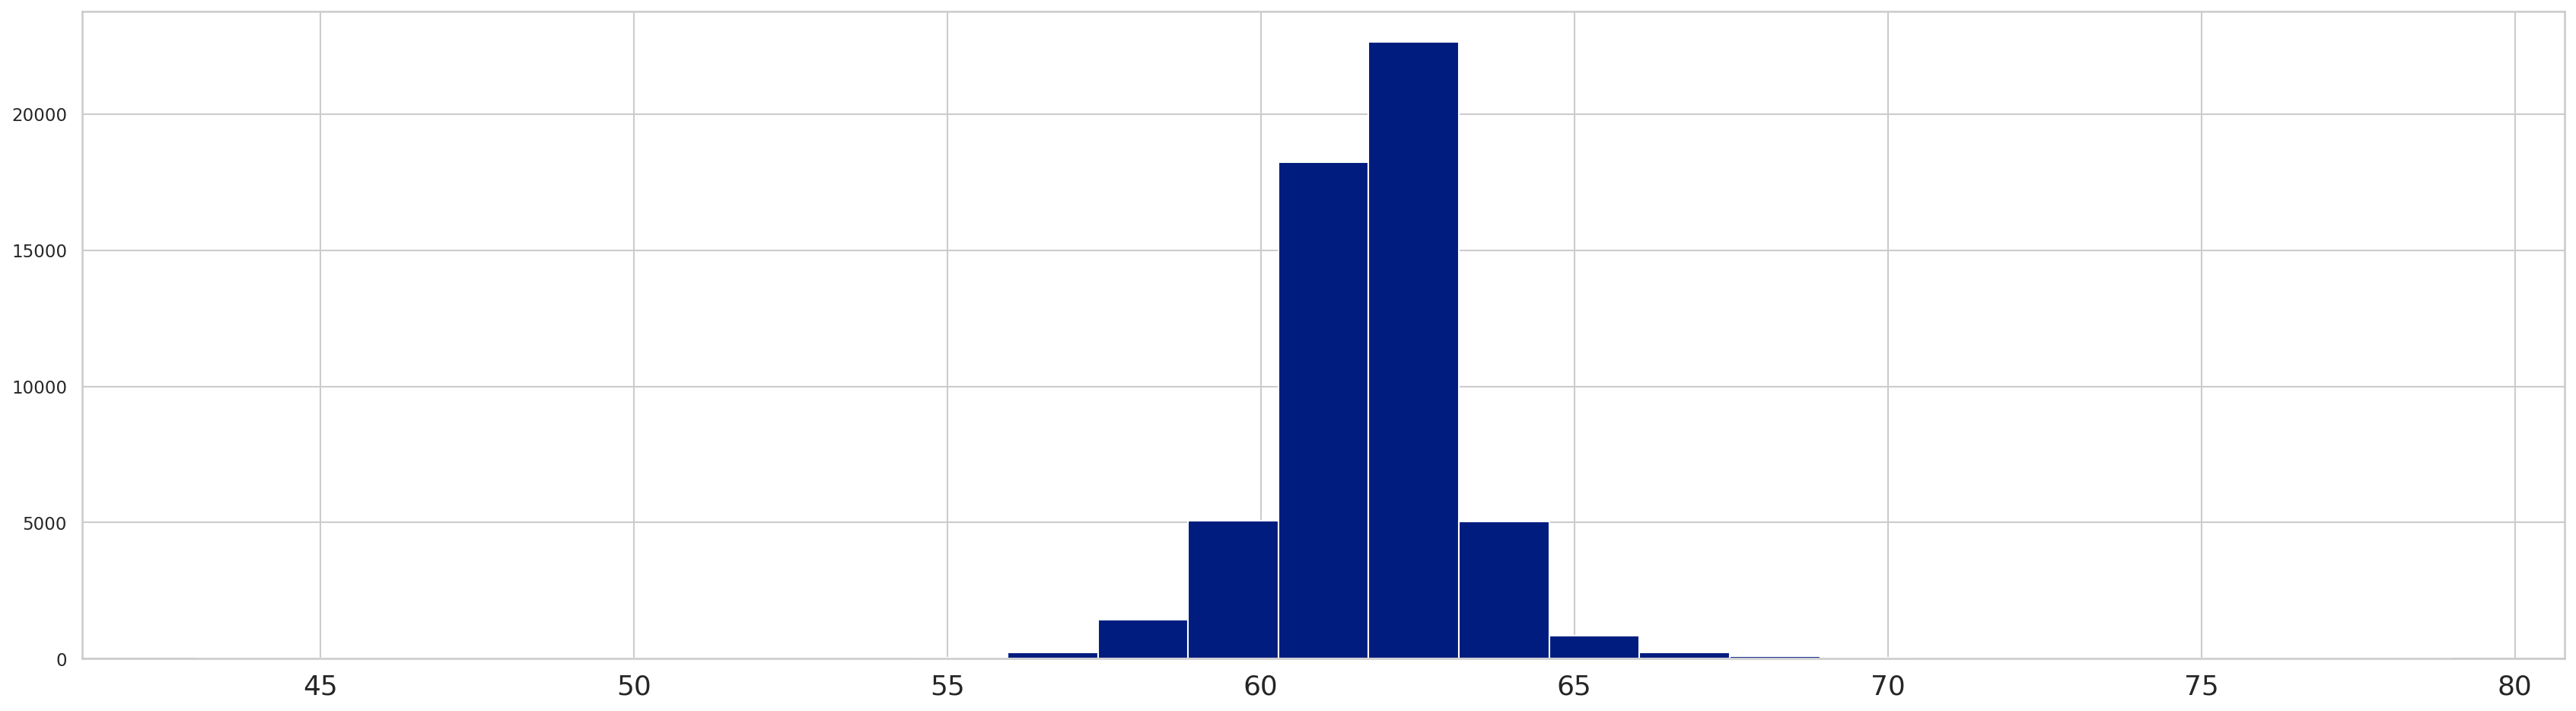

In [22]:
plt.hist('depth' , data=df , bins=25)

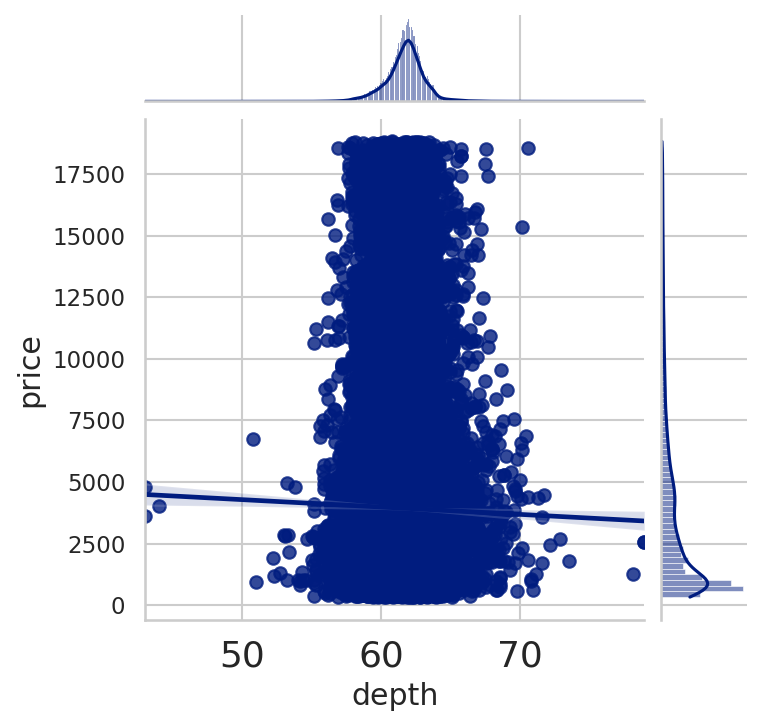

In [23]:
sns.jointplot(x='depth', y='price' , data=df , kind='reg', size=5)

### We can Infer from the plot that the Price can vary heavily for the same Depth.
* **And the Pearson's Correlation shows that there's a slightly inverse relation between the two.**

## 3.6) Table
* **Table is the Width of the Diamond's Table expressed as a Percentage of its Average Diameter.**
* **If the Table (Upper Flat Facet) is too Large then light will not play off of any of the Crown's angles or facets and will not create the Sparkly Rainbow Colors.**
* **If it is too Small then the light will get Trapped and that Attention grabbing shaft of light will never come out but will “leak” from other places in the Diamond.**

[Click Here to Learn More about How Table Affects the Price of Diamonds.](https://beyond4cs.com/grading/depth-and-table-values/)

In [ ]:
sns.kdeplot(df['table'] ,shade=True , color='orange')

In [ ]:
sns.jointplot(x='table', y='price', data=df , size=5)

## 3.7) Dimensions

* **As the Dimensions increases, Obviously the Prices Rises as more and more Natural Resources are Utilised.**

(2.0, 10.0)

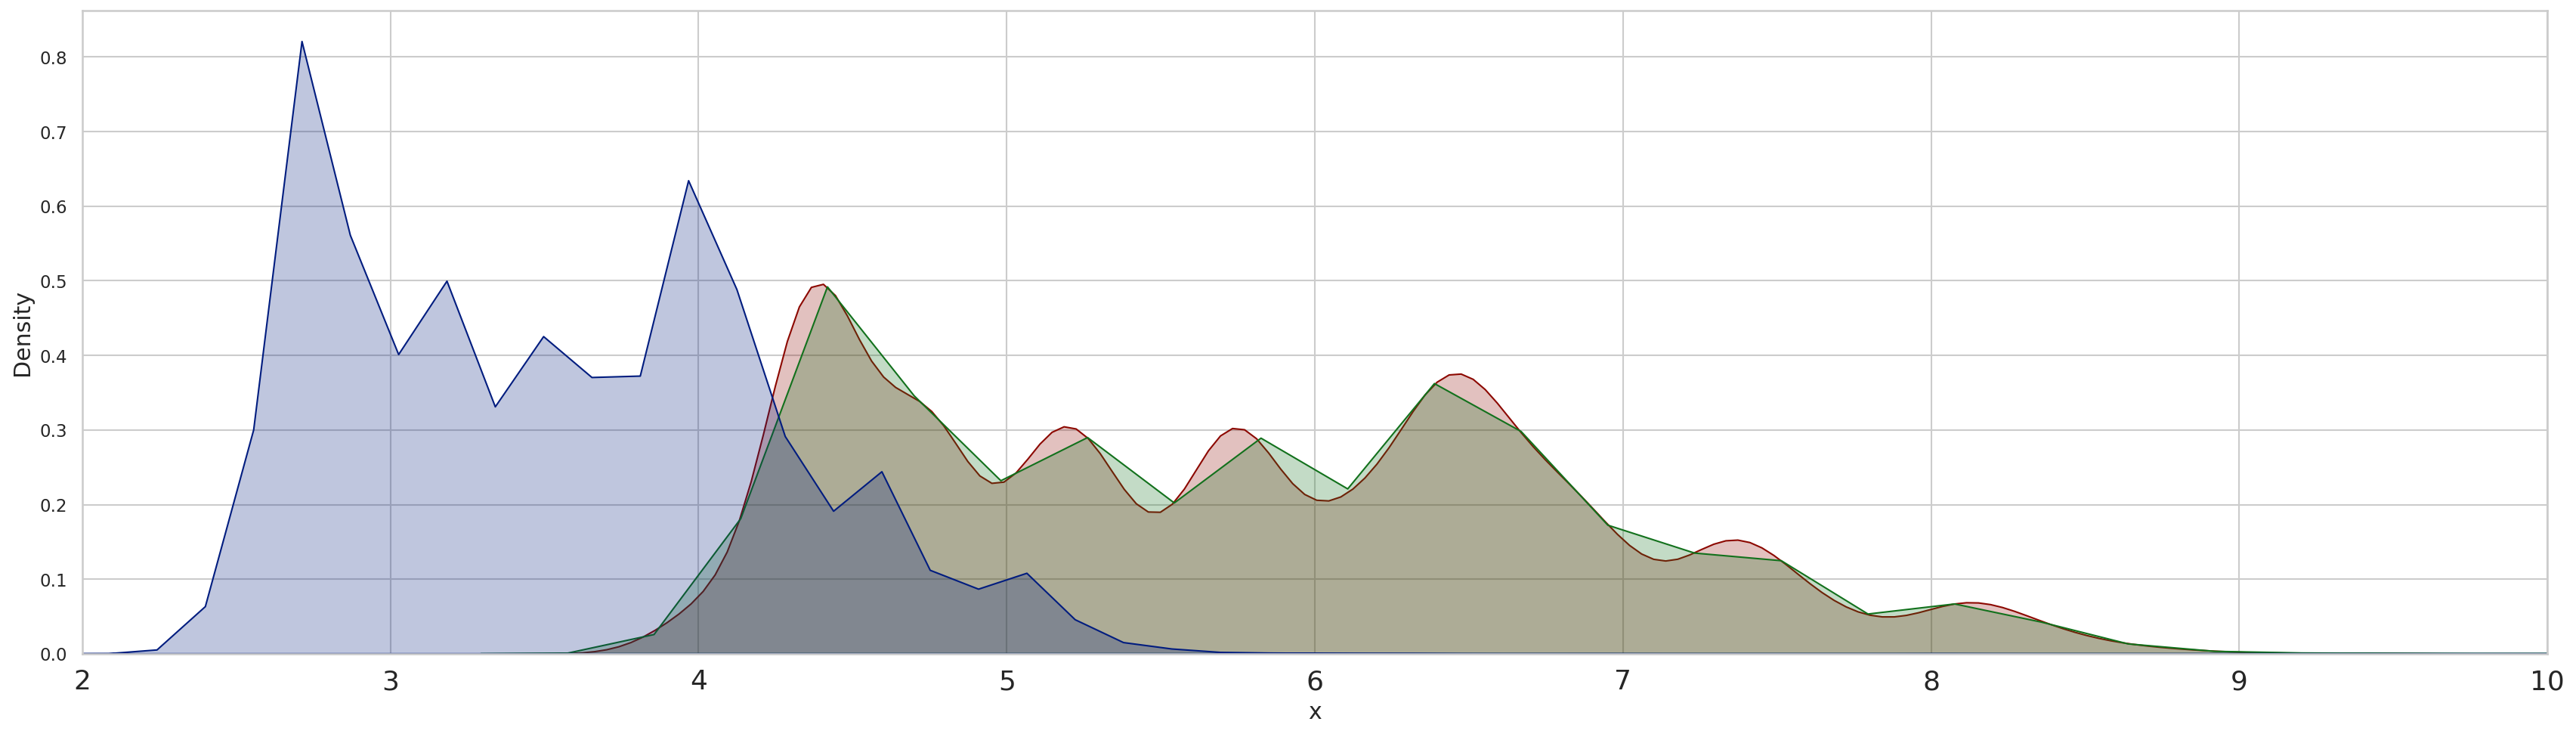

In [24]:
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

**We'll Create a New Feature based on the Dimensions in the Next Section called 'Volume' and Visualize how it affects the Price.**

<a id="there_you_go_4"></a>
# 4) Feature Engineering

## 4.1) Create New Feature 'Volume'

In [25]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0.0, 50000.0)

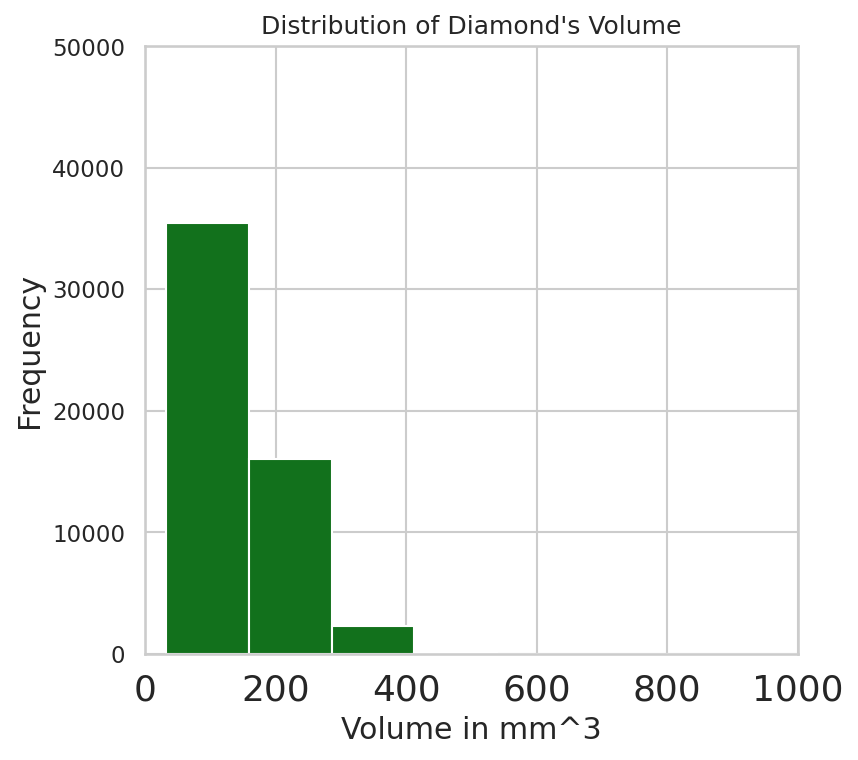

In [26]:
plt.figure(figsize=(5,5))
plt.hist( x=df['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

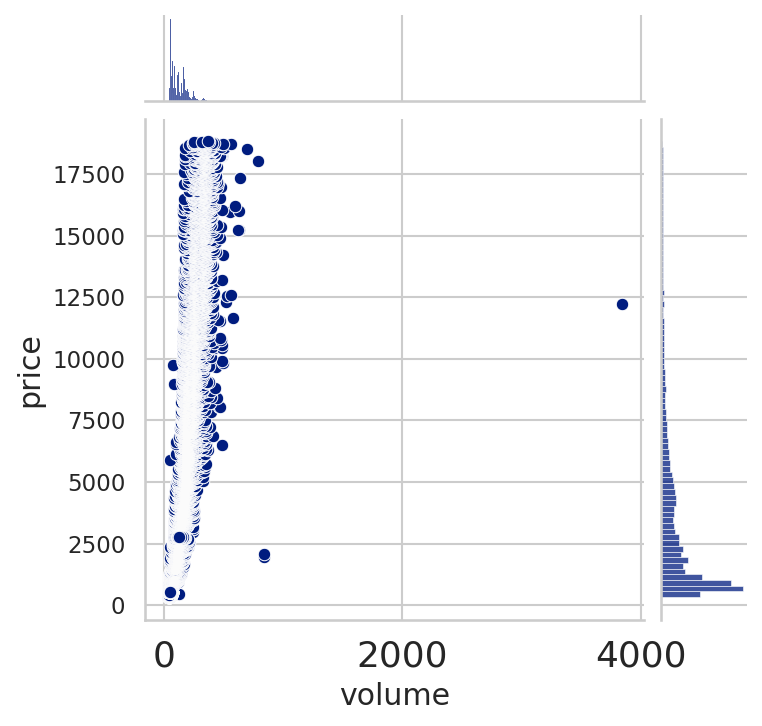

In [27]:
sns.jointplot(x='volume', y='price' , data=df, size=5)

### It seems that there is Linear Relationship between Price and Volume (x \* y \* z).

## 4.2) Drop X, Y, Z

In [28]:
df.drop(['x','y','z'], axis=1, inplace= True)
#df.head()

<a id="there_you_go_5"></a>
# 5) Feature Encoding

* **Label the Categorical Features with digits to Distinguish.**
* **As we can't feed String data for Modelling.**

In [29]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [ ]:
#df.head()

<a id="there_you_go_6"></a>
# 6) Feature Scaling

* **Divide the Dataset into Train and Test, So that we can fit the Train for Modelling Algos and Predict on Test.**
* **Then Apply Feature Scaling although it's not neccessary in this case. But it surely helps.**

In [ ]:
# Split the data into train and test.

In [30]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [ ]:
# Applying Feature Scaling ( StandardScaler )
# You can also Apply MinMaxScaler.

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="there_you_go_7"></a>
# 7) Modelling Algos

In [32]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

## 7.1) Linear Regression

In [44]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

print("Linear Regression Coefficients: \n")
print(clf_lr.coef_)

R2_Scores.append(r2)

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

x_train = X_train
y_train_2 = y_train
x_train_1 = sm.add_constant(x_train)
model = sm.OLS(y_train_2, x_train_1)
results = model.fit()
print(results.summary())



####### Linear Regression #######
Score : 0.8814
[0.87116164 0.88350756 0.87757769 0.87635168 0.88384912]

MSE    : 1911398.80 
MAE    : 926.72 
RMSE   : 1382.53 
R2     : 0.88 
Linear Regression Coefficients: 

[3883.21032259   78.6948186  -437.56384167  524.31267264 -149.63341346
 -209.98455197   68.81639797]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 4.521e+04
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:22:47   Log-Likelihood:            -3.7302e+05
No. Observations:               43136   AIC:                         7.461e+05
Df Residuals:                   43128   BIC:                         7.461e+05
Df Model:                           7                 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


## 7.2) Lasso Regression

In [45]:
clf_la = Lasso(normalize=True)
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Coefficients: \n")
print(clf_la.coef_)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Lasso Regression ######
Score : 0.8659
[0.84325995 0.86900907 0.86386374 0.86539938 0.86976969]
Lasso Regression Coefficients: 

[3474.35713633    0.         -135.70926899  267.98808634   -0.
   -0.           84.7921695 ]

MSE    : 2162331.94 
MAE    : 909.60 
RMSE   : 1470.49 
R2     : 0.87 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


## 7.3) AdaBosst Regression

In [42]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)


print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### AdaBoost Regression ######
Score : 0.9079
[0.85532948 0.88426626 0.86486724 0.84321322 0.90441643]

MSE    : 1484641.08 
MAE    : 852.92 
RMSE   : 1218.46 
R2     : 0.91 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.4s finished


## 7.4) Ridge Regression

In [43]:
clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Coefficients: \n")
print(clf_rr.coef_)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished



###### Ridge Regression ######
Score : 0.7537
[0.74232856 0.75599775 0.74753493 0.75626    0.74960313]
Ridge Regression Coefficients: 

[1268.47136069   48.5410688    -7.09300633  114.58785275  -30.26954029
   35.59833303 1182.08191415]

MSE    : 3970442.17 
MAE    : 1346.18 
RMSE   : 1992.60 
R2     : 0.75 


## 7.5) GradientBoosting Regression

In [ ]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

## 7.6) RandomForest Regression

In [ ]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

### Tuning Parameters

In [ ]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

## 7.7) KNeighbours Regression

In [ ]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

### Tuning Parameters

In [ ]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

<a id="there_you_go_8"></a>
# 8) Visualizing R2-Score of Algorithms

In [ ]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

In [ ]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

In [ ]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=6 , aspect=4)

### Random Forest Regressor gives us the highest R2-Score [ 98% ] .

# Thank You :)